# A Python Tour of Data Science: Data Visualization

[Michaël Defferrard](http://deff.ch), *PhD student*, [EPFL](http://epfl.ch) [LTS2](http://lts2.epfl.ch)

# Exercise

Data visualization is a key aspect of exploratory data analysis.
During this exercise we'll gradually build more and more complex vizualisations. We'll do this by replicating plots. Try to reproduce the lines but also the axis labels, legends or titles.

* Goal of data visualization: clearly and efficiently communicate information through visual representations. While tables are generally used to look up a specific measurement, charts are used to show patterns or relationships.
* Means: mainly statistical graphics for exploratory analysis, e.g. scatter plots, histograms, probability plots, box plots, residual plots, but also [infographics](https://en.wikipedia.org/wiki/Infographic) for communication.

*Data visualization is both an art and a science. It should combine both aesthetic form and functionality.*

# 1 Time series

To start slowly, let's make a static line plot from some time series. Reproduce the plots below using:
1. The procedural API of [matplotlib](http://matplotlib.org), the main data visualization library for Python. Its procedural API is similar to matlab and convenient for interactive work.
2. [Pandas](http://pandas.pydata.org), which wraps matplotlib around his DataFrame format and makes many standard plots easy to code. It offers many [helpers for data visualization](http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html).

**Hint**: to plot with pandas, you first need to create a DataFrame, pandas' tabular data format.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Random time series.
n = 1000
rs = np.random.RandomState(42)
data = rs.randn(n, 4).cumsum(axis=0)

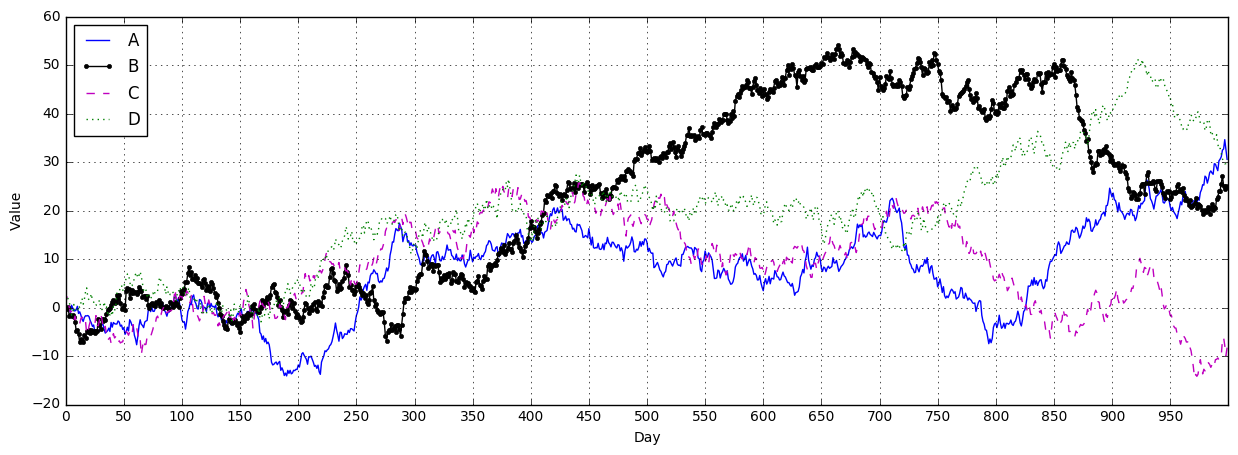

In [2]:
# plt.figure(figsize=(15,5))
# plt.plot(data[:, 0])

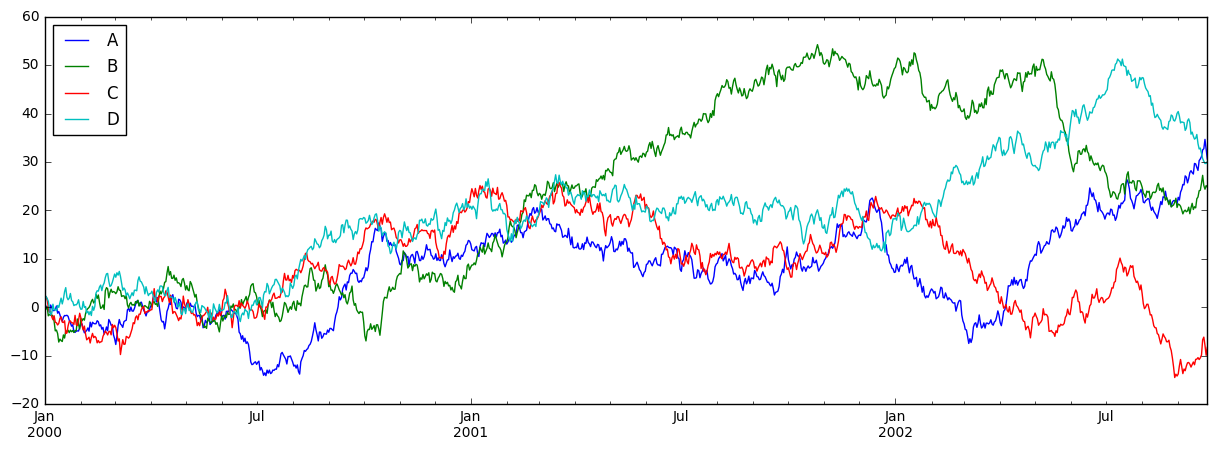

In [3]:
# df = pd.DataFrame(...)
# df.plot(...)

# 2 Categories

Categorical data is best represented by [bar](https://en.wikipedia.org/wiki/Bar_chart) or [pie](https://en.wikipedia.org/wiki/Pie_chart) charts. Reproduce the plots below using the object-oriented API of matplotlib, which is recommended for programming.

**Question**: What are the pros / cons of each plot ?

**Tip**: the [matplotlib gallery](http://matplotlib.org/gallery.html) is a convenient starting point.

In [4]:
data = [10, 40, 25, 15, 10]
categories = list('ABCDE')

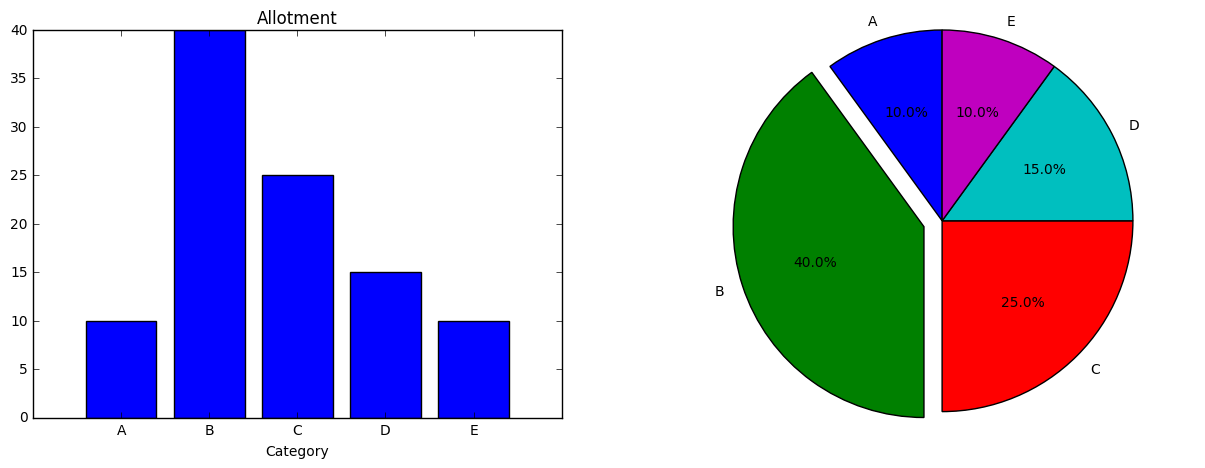

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Right plot.
# axes[1].
# axes[1].

# Left plot.
# axes[0].
# axes[0].

# 3 Frequency

A frequency plot is a graph that shows the pattern in a set of data by plotting how often particular values of a measure occur. They often take the form of an [histogram](https://en.wikipedia.org/wiki/Histogram) or a [box plot](https://en.wikipedia.org/wiki/Box_plot).

Reproduce the plots with the following three libraries, which provide high-level declarative syntax for statistical visualization as well as a convenient interface to pandas:
* [Seaborn](http://seaborn.pydata.org) is a statistical visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Its advantage is that you can modify the produced plots with matplotlib, so you loose nothing.
* [ggplot](http://ggplot.yhathq.com) is a (partial) port of the popular [ggplot2](http://ggplot2.org) for R. It has his roots in the influencial book [the grammar of graphics](https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/GOG.html). Convenient if you know ggplot2 already.
* [Vega](https://vega.github.io/) is a declarative format for statistical visualization based on [D3.js](https://d3js.org), a low-level javascript library for interactive visualization. [Vincent](https://vincent.readthedocs.io/en/latest/) (discontinued) and [altair](https://altair-viz.github.io/) are Python libraries to vega. Altair is quite new and does not provide all the needed functionality yet, but it is promising !

**Hints**:
* Seaborn, look at `distplot()` and `boxplot()`.
* ggplot, we are interested by the [geom_histogram](http://ggplot.yhathq.com/docs/geom_histogram.html) geometry.

In [6]:
import seaborn as sns
import os
df = sns.load_dataset('iris', data_home=os.path.join('..', 'data'))

/usr/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


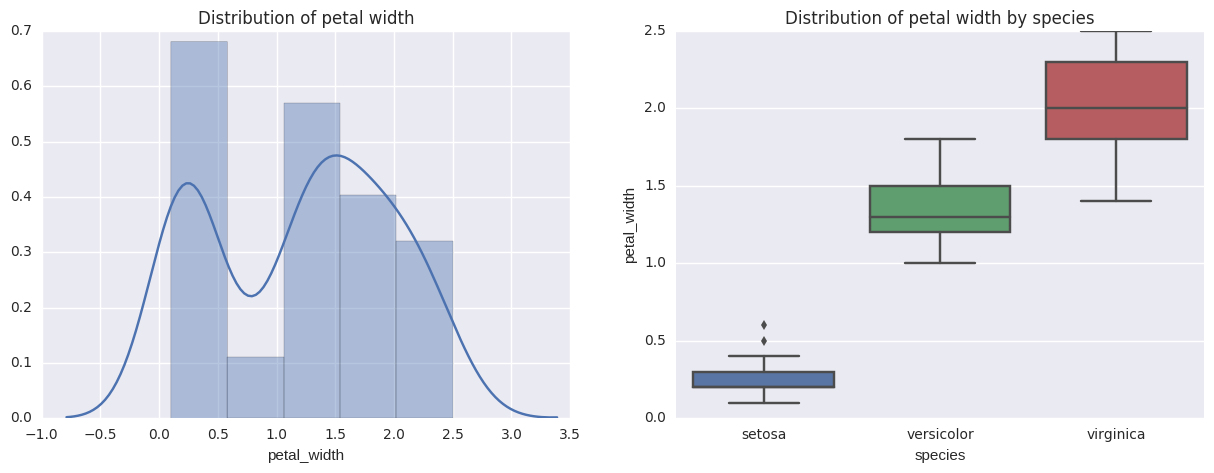

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Your code for Seaborn: distplot() and boxplot().

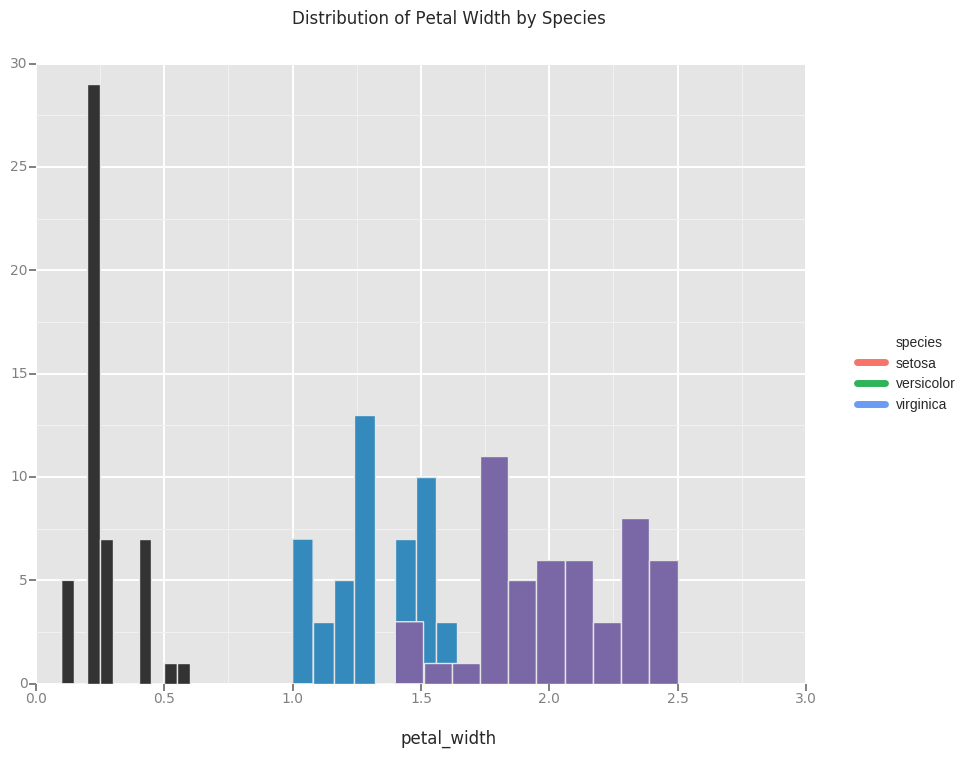

<ggplot: (-9223363267557019718)>

In [8]:
import ggplot

# Your code for ggplot.

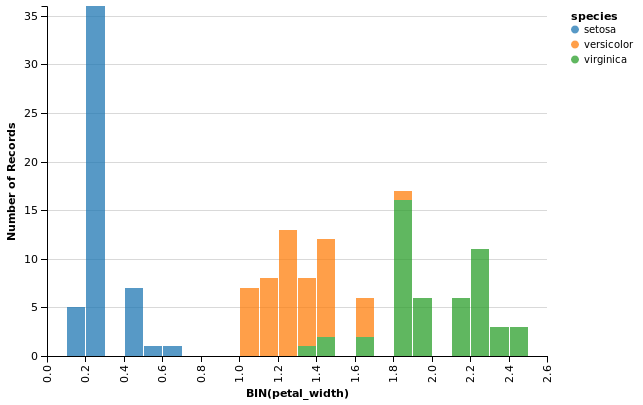

In [10]:
import altair

# altair.Chart(df).mark_bar(opacity=.75).encode(
#     x=...,
#     y=...,
#     color=...
# )

# 4 Correlation

[Scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) are very much used to assess the correlation between 2 variables. Pair plots are then a useful way of displaying the pairwise relations between variables in a dataset.

Use the seaborn `pairplot()` function to analyze how separable is the iris dataset.

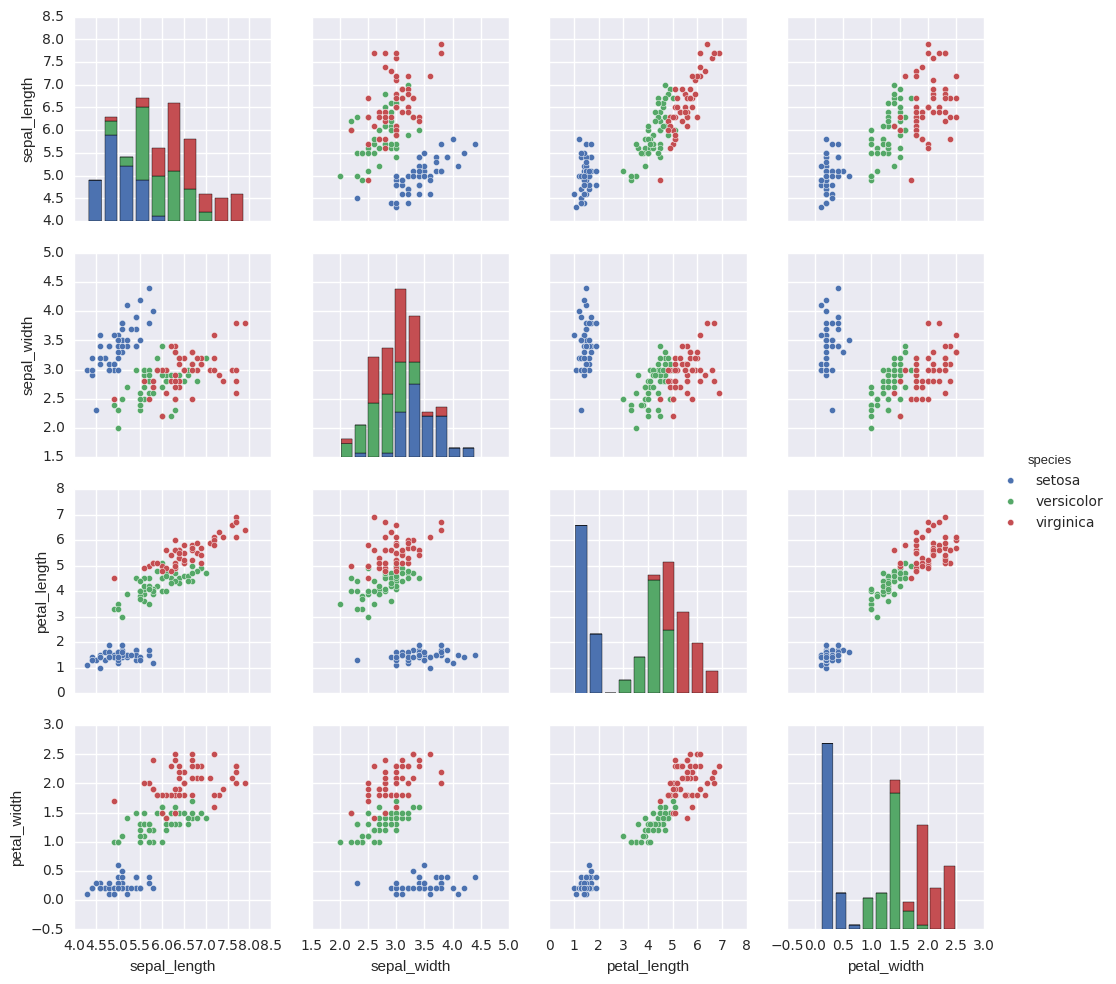

In [11]:
# One line with Seaborn.

# 5 Dimensionality reduction

Humans can only comprehend up to 3 dimensions (in space, then there is e.g. color or size), so [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) is often needed to explore high dimensional datasets. Analyze how separable is the iris dataset by visualizing it in a 2D scatter plot after reduction from 4 to 2 dimensions with two popular methods:
1. The classical [principal componant analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
2. [t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

**Hints**:
* t-SNE is a stochastic method, so you may want to run it multiple times.
* The easiest way to create the scatter plot is to add columns to the pandas DataFrame, then use the Seaborn `swarmplot()`.

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
# df['pca1'] = 
# df['pca2'] = 

# df['tsne1'] = 
# df['tsne2'] = 

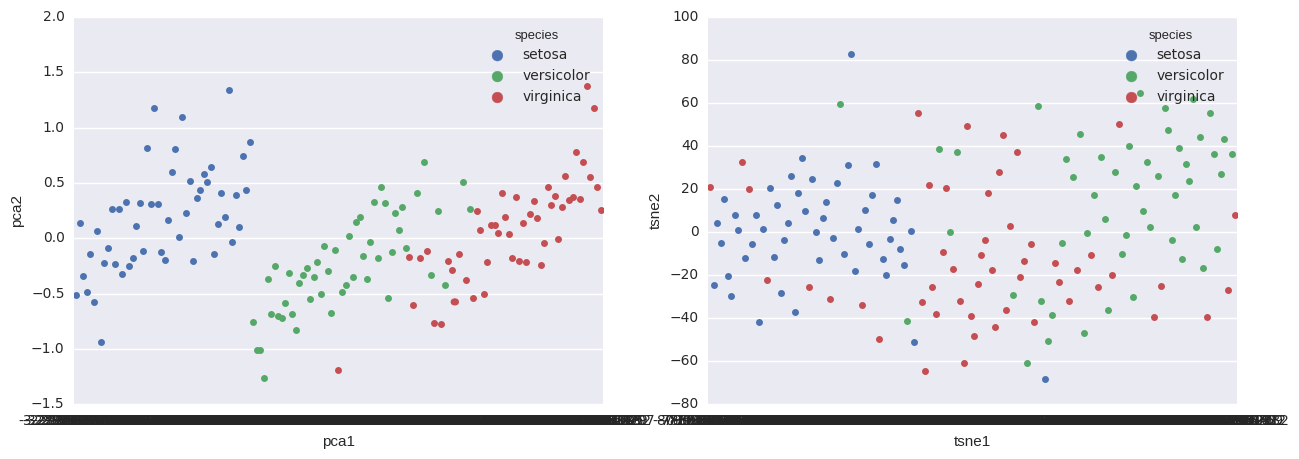

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.swarmplot(x='pca1', y='pca2', data=df, hue='species', ax=axes[0])
sns.swarmplot(x='tsne1', y='tsne2', data=df, hue='species', ax=axes[1]);

# 6 Interactive visualization

For interactive visualization, look at [bokeh](http://bokeh.pydata.org) (we used it during the [data exploration exercise](http://nbviewer.jupyter.org/github/mdeff/ntds_2016/blob/with_outputs/toolkit/01_demo_acquisition_exploration.ipynb#4-Interactive-Visualization)) or [VisPy](http://vispy.org).

# 7 Geographic map

If you want to visualize data on an interactive map, look at [Folium](https://github.com/python-visualization/folium).